# Data Analysis following ThinkStats
https://greenteapress.com/thinkstats2/html/

I don't use custom functions provided in the book and write my own.
I write my own function instead of provided in the book.

All used datasets already have been extracted and prepared. All of them you can download in kaggle.

## Some columns's name descritption for preg database

**caseid** is the integer ID of the respondent.

**prglngth** is the integer duration of the pregnancy in weeks.

**outcome** is an integer code for the outcome of the pregnancy. The code 1 indicates a live birth.Code 4 indicates a miscarriage; that is, a pregnancy that ended spontaneously, usually with no known medical cause.

**pregordr** is a pregnancy serial number; for example, the code for a respondent’s first pregnancy is 1, for the second pregnancy is 2, and so on.

**birthord** is a serial number for live births; the code for a respondent’s first child is 1, and so on. For outcomes other than live birth, this field is blank.

**birthwgt_lb** and **birthwgt_oz** contain the pounds and ounces parts of the birth weight of the baby.

**agepreg** is the mother’s age at the end of the pregnancy.

**finalwgt** is the statistical weight associated with the respondent. It is a floating-point value 
that indicates the number of people in the U.S. population this respondent represents.   

descitption of other features you can find here https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle5Codebook-UsersGuide.pdf

In [441]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import math
import copy
import random 

import scipy.stats # for analytic distributions

import collections

In [442]:
pd.set_option('display.max_rows',None)

## load prgnancy file

In [443]:
preg = pd.read_csv('code/preg.csv')

In [444]:
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [445]:
preg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13593 entries, 0 to 13592
Columns: 244 entries, caseid to totalwgt_lb
dtypes: float64(171), int64(73)
memory usage: 25.3 MB


## load respondents file

information about each woman

In [446]:
resp = pd.read_csv('code/resp.csv')

In [447]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


# Data cleaning

In [448]:
print(preg.birthwgt_lb.unique())
print(preg.birthwgt_oz.unique())

[ 8.  7.  9.  6.  4. nan  5. 10. 12. 14.  3.  1. 11.  2. 13.  0. 15.]
[13. 14.  2.  0.  3.  9.  6. 10. nan 11.  8.  5. 12.  1.  7.  4. 15.]


In [449]:
np.sort(preg.birthwgt_lb.unique())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., nan])

In [450]:
def CleanFemPreg(df):
#   making mother age float
#     df.agepreg /= 100.0
    
# replace string-value with nan values
    na_vals = [97, 98, 99]
    df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
    df.birthwgt_oz.replace(na_vals, np.nan, inplace=True)

    df['totalwgt_lb'] = df.birthwgt_lb + df.birthwgt_oz / 16.0
    
#     df.loc[df.birthwgt_lb > 20, 'birthwgt_lb'] = np.nan
    
    return df

In [451]:
preg = CleanFemPreg(preg)

In [452]:
print(preg.birthwgt_lb.unique())
print(preg.birthwgt_oz.unique())

[ 8.  7.  9.  6.  4. nan  5. 10. 12. 14.  3.  1. 11.  2. 13.  0. 15.]
[13. 14.  2.  0.  3.  9.  6. 10. nan 11.  8.  5. 12.  1.  7.  4. 15.]


# Validation

value   label                  Total

1       LIVE BIRTH              9148<br>
2       INDUCED ABORTION        1862<br>
3       STILLBIRTH               120<br>
4       MISCARRIAGE             1921<br>
5       ECTOPIC PREGNANCY        190<br>
6       CURRENT PREGNANCY        352<br>

In [453]:
preg.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

# Interpretation

In [454]:
preg[preg.caseid==10229]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
11093,10229,1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,0,0,0,1914.323805,2021.999794,3369.662656,2,65,NaN,NaN
11094,10229,2,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,0,0,0,1914.323805,2021.999794,3369.662656,2,65,NaN,NaN
11095,10229,3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,0,0,0,1914.323805,2021.999794,3369.662656,2,65,NaN,NaN
11096,10229,4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,0,0,0,1914.323805,2021.999794,3369.662656,2,65,NaN,NaN
11097,10229,5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,0,0,0,1914.323805,2021.999794,3369.662656,2,65,NaN,NaN
11098,10229,6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,0,0,0,1914.323805,2021.999794,3369.662656,2,65,NaN,NaN
11099,10229,7,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,1914.323805,2021.999794,3369.662656,2,65,NaN,7.6875


The problem: onw woman - a few pregnancy => a few indices to one id

create database with collection of all indices for one woman

In [455]:
def MakePregMap(df):
    d = collections.defaultdict(list)
    for index, caseid in df.caseid.iteritems():
        d[caseid].append(index)
    return d

In [456]:
caseid = 10229
preg_map = MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1], dtype=int64)

In [457]:
indices

[11093, 11094, 11095, 11096, 11097, 11098, 11099]

# Exercise for chapter 1

In [458]:
preg.birthord.value_counts()

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

In [459]:
preg.birthord.isnull().sum()

4445

In [460]:
preg.prglngth.value_counts().sort_index()

0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

In [461]:
preg.totalwgt_lb.mean()

7.265628457623368

In [462]:
preg['totalwgt_kg'] = preg.totalwgt_lb.apply(lambda x: x*0.453592 )

In [463]:
resp.age_r.value_counts().sort_index()

15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64

In [464]:
resp[resp.caseid==1].age_r

1069    44
Name: age_r, dtype: int64

In [465]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


In [466]:
preg[preg.caseid==2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

In [467]:
preg[preg.caseid==2298].index.values

array([2610, 2611, 2612, 2613], dtype=int64)

## Cross-validation of resp and preg databases

check out how value of pregnancy in each datasets are correspond to each other

In [468]:
uniq_caseid = preg.caseid.unique()

In [469]:
res = []
for ID in uniq_caseid:
    difference = len(preg[preg.caseid== ID ].index.values) - resp[resp.caseid==ID].pregnum.values

    res.append(difference)

In [470]:
print(np.mean(res))
print(max(res))
print(min(res))

0.0
[0]
[0]


# Histograms

<AxesSubplot:xlabel='birthwgt_lb', ylabel='Count'>

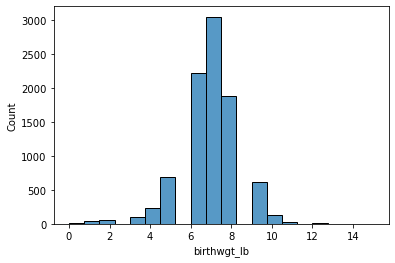

In [471]:
sns.histplot(preg[preg.outcome==1].birthwgt_lb,bins=20)

<AxesSubplot:xlabel='agepreg', ylabel='Count'>

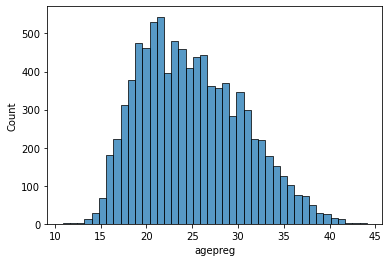

In [472]:
sns.histplot(preg[preg.outcome==1].agepreg)

In [473]:
preg.agepreg.mode()

0    22.75
dtype: float64

<AxesSubplot:xlabel='prglngth', ylabel='Count'>

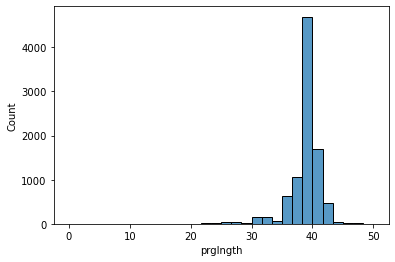

In [474]:
sns.histplot(preg[preg.outcome==1].prglngth,bins=30)

In [475]:
preg[preg.outcome==1].prglngth.mode()

0    39
dtype: int64

## Outliers

lowest values

In [476]:
np.sort(preg[preg.outcome==1].prglngth.unique())[:9]

array([ 0,  4,  9, 13, 17, 18, 19, 20, 21], dtype=int64)

highest values 

In [477]:
np.sort(preg[preg.outcome==1].prglngth.unique())[-10:]

array([40, 41, 42, 43, 44, 45, 46, 47, 48, 50], dtype=int64)

In [478]:
preg[preg.outcome==1].prglngth.value_counts().sort_index()[-10:]

40    1116
41     587
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

we will take into consideration only pregnancy with good outcome => week > 27

## Fisrt babies

In [479]:
firsts = preg[(preg.outcome==1) & (preg.birthord == 1)]
others = preg[(preg.outcome==1) & (preg.birthord != 1)]

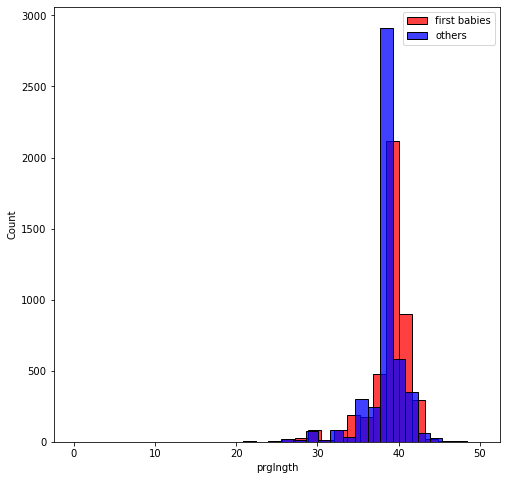

In [480]:
ax = plt.figure(figsize=[8,8])

sns.histplot(firsts.prglngth, color='red',bins=30,legend=True)
sns.histplot(others.prglngth, color='blue',bins=30,legend=True)

plt.legend(['first babies','others'])

### summarizing statistics

In [481]:
preg[(preg.outcome==1)].prglngth.mean()

38.56055968517709

In [482]:
preg[(preg.outcome==1)].prglngth.var()

7.302662067826851

In [483]:
preg[(preg.outcome==1)].prglngth.std()

2.702343810070593

### Effect size

An effect size is a summary statistic intended to describe the size of an effect.

#### Using mean

In [484]:
mean_diff = firsts.prglngth.mean() - others.prglngth.mean()
mean_diff

0.07803726677754952

In [485]:
print(f"mean difference is {mean_diff * 7 *24} hours")

mean difference is 13.11026081862832 hours


In [486]:
print(f"As a fraction of the typical pregnancy length, this difference is  {round(100*mean_diff/preg[(preg.outcome==1)].prglngth.mean(),2)} %")

As a fraction of the typical pregnancy length, this difference is  0.2 %


#### Cohen Effect Size

In [487]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    
    # calculation of pooled standart deviation
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_var = (n1 * var1 + n2 * var2)/(n1 + n2)
    
    return diff/math.sqrt(pooled_var)

In [488]:
d = CohenEffectSize(firsts.prglngth, others.prglngth)
print(f'the difference in means is {round(d,3)} standard deviations')

the difference in means is 0.029 standard deviations


So, mean length of pregnancy for the first baby is higher by 13 hours. The difference is 0.2% of the typical (mean) pregnancy length. In standart deviations units the difference is 0.029.

# Exercises for chapter 2

difference in weight for fisrt and other babies

In [489]:
mean_diff = abs(firsts.totalwgt_lb.mean() - others.totalwgt_lb.mean())
mean_diff

0.12476118453549034

In [490]:
d = CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)
d

-0.088672927072602

Histograms abour respondets 

[Text(0.5, 1.0, "the total income for the respondent's family")]

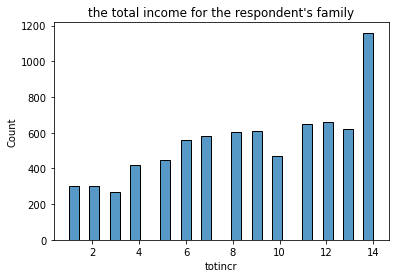

In [491]:
sns.histplot(resp.totincr,bins=30).set(title="the total income for the respondent's family")

[Text(0.5, 1.0, 'the respondents age at the time of interview')]

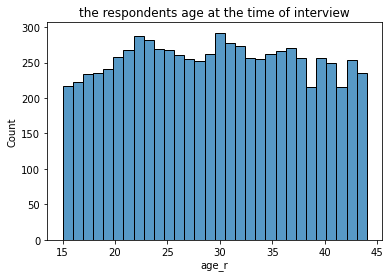

In [492]:
sns.histplot(resp.age_r, bins=30).set(title='the respondents age at the time of interview')

[Text(0.5, 1.0, "the number of people in the respondent's household")]

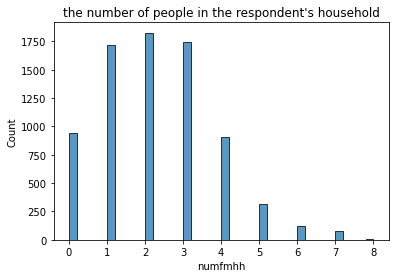

In [493]:
sns.histplot(resp.numfmhh).set(title="the number of people in the respondent's household")

[Text(0.5, 1.0, 'the number of children borne by the respondent')]

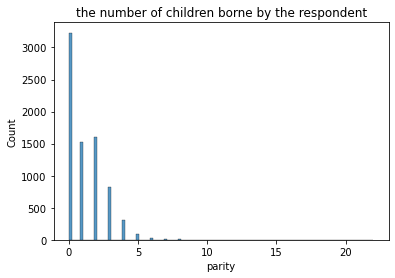

In [494]:
sns.histplot(resp.parity).set(title="the number of children borne by the respondent")

In [495]:
resp.parity.value_counts().sort_index()[-5:]

8     8
9     2
10    3
16    1
22    1
Name: parity, dtype: int64

Is there connection between income and parity 

In [496]:
high_income = resp[resp.totincr>13]
other_income = resp[resp.totincr<=13]

<AxesSubplot:xlabel='parity', ylabel='Count'>

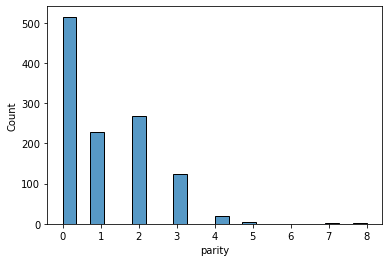

In [497]:
sns.histplot(high_income.parity)

In [498]:
mean_diff = abs(high_income.parity.mean() - other_income.parity.mean())
print(f'mean difference between high income and other in parity is {round(mean_diff,2)}')
print(f"this is {round(100 * mean_diff/resp.parity.mean(),2)}% of mean parity of all respondents")

mean difference between high income and other in parity is 0.17
this is 14.2% of mean parity of all respondents


In [499]:
print(f"the difference in means is {round(CohenEffectSize(high_income.parity, other_income.parity),3)} standard deviations")

the difference in means is -0.125 standard deviations


# Probability mass functions
maps from each value to its probability. A probability is a frequency expressed as a fraction of the sample size, n. To get from frequencies to probabilities, we divide through by n, which is called normalization.

In [500]:
def pmf(ser):
    res = {}
    
    all_vals = ser.value_counts().index
    total = ser.value_counts().sum()
    
    for val in all_vals:
        count = ser.value_counts()[val]
        res[val] = count/total
        
#     check for normalisation
    sums = 0
    for key in res:
        sums += res[key]
    
    if round(sums,3) != 1.000:
        print(f'total sum of all probabilities is {sums}')
    
    return res

In [501]:
pmf_caseid = pmf(preg.caseid)

[None]

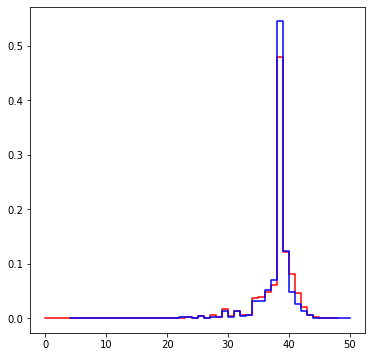

In [502]:
plt.figure(figsize=(6,6))
sns.lineplot(x = pd.Series(pmf(firsts.prglngth)).index, y =pd.Series(pmf(firsts.prglngth)).values ,
             color='red',drawstyle='steps-pre').set(label='first')

sns.lineplot(x = pd.Series(pmf(others.prglngth)).index, y =pd.Series(pmf(others.prglngth)).values, 
             color='blue',drawstyle='steps-pre').set(label='other')

Based on this figure, first babies seem to be less likely than others to arrive on time (week 39) and more likely to be a late (weeks 41 and 42).

### Visualisation to highlight the difference

[Text(0.5, 1.0, 'Difference in PMFs')]

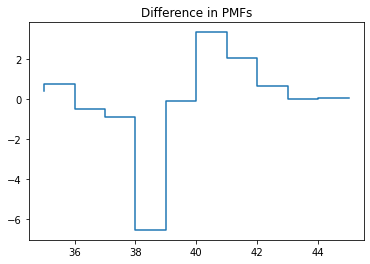

In [503]:
weeks = range(35,46)

diffs = []

for week in weeks:
    p1 = pmf(firsts.prglngth)[week]
    p2 = pmf(others.prglngth)[week]
    
    diff = 100 * (p1 - p2)
    diffs.append(diff)

sns.lineplot(y = diffs, x=weeks, drawstyle='steps-pre').set(title = 'Difference in PMFs')

This figure makes the pattern clearer: first babies are less likely to be born in week 39, and somewhat more likely to be born in weeks 41 and 42.

# The class size paradox
At many American colleges and universities, the student-to-faculty ratio is about 10:1. But students are often surprised to discover that their average class size is bigger than 10. 

There are two reasons for the discrepancy:

* Students typically take 4–5 classes per semester, but professors often teach 1 or 2.
* The number of students in a small class is small, but the number of students in a large class is large.

In [504]:
d = { 7: 8, 12: 8, 17: 14, 22: 4, 
          27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }

In [505]:
# making pmf for d
s = 0
for key in d:
    s += d[key]

d_pmf = copy.deepcopy(d)
d_pmf.update((x, y/s) for x,y in d_pmf.items())

In [506]:
d_pmf

{7: 0.12307692307692308,
 12: 0.12307692307692308,
 17: 0.2153846153846154,
 22: 0.06153846153846154,
 27: 0.09230769230769231,
 32: 0.18461538461538463,
 37: 0.12307692307692308,
 42: 0.046153846153846156,
 47: 0.03076923076923077}

In [507]:
def average_class_size(dist):
    s = 0
    class_sum = 0
    for key in dist:
        s += dist[key]*key
        class_sum += dist[key]
    
    return s/class_sum

In [508]:
average_class_size(d)

23.692307692307693

## biased pmf

For each class size, x, we multiply the probability by x, the number of students who observe that class size. The result is a new Pmf that represents the biased distribution.

In [509]:
d_pmf_biased = copy.deepcopy(d_pmf)

In [510]:
# update class size probabitiy
for key in d_pmf_biased:
    d_pmf_biased[key] = d_pmf_biased[key]*key

    # normalisation
sv = sum(d_pmf_biased.values())
d_pmf_biased.update( (x,y/sv) for x,y in d_pmf_biased.items())

In [511]:
average_class_size(d_pmf_biased)

29.123376623376625

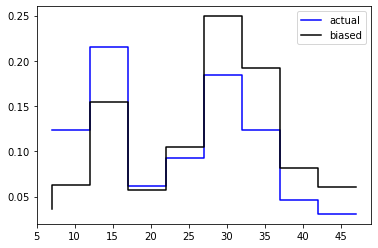

In [512]:
sns.lineplot(x = pd.Series(d_pmf).index, y=pd.Series(d_pmf).values, color='blue',drawstyle='steps-pre')
sns.lineplot(x = pd.Series(d_pmf_biased).index, y=pd.Series(d_pmf_biased).values, color='black',drawstyle='steps-pre')
plt.legend(labels=["actual","biased"])

## reverse task
Suppose you want to find the distribution of class sizes at a college, but you can’t get reliable data from the Dean. An alternative is to choose a random sample of students and ask how many students are in their classes.

In [513]:
d_pmf_new = copy.deepcopy(d_pmf_biased)

In [514]:
d_pmf_new.update( (x, y/x) for x,y in d_pmf_new.items()) 

# normalisation
s = sum(d_pmf_new.values())
d_pmf_new.update( (x, y/s) for x,y in d_pmf_new.items())    

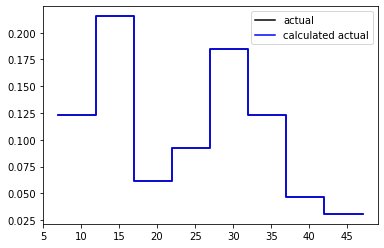

In [515]:
sns.lineplot(x = pd.Series(d_pmf).index, y=pd.Series(d_pmf).values, color='black',drawstyle='steps-pre')
sns.lineplot(x = pd.Series(d_pmf_new).index, y=pd.Series(d_pmf_new).values, color='blue',drawstyle='steps-pre')
plt.legend(labels=['actual','calculated actual'])

# Exercises to chapter 3

## Ex 1&2 : survey children and ask how many children are in their family

sns.histplot(resp.numkdhh)

In [516]:
kid_pmf = pmf(resp.numkdhh)

In [517]:
kid_pmf_biased = copy.deepcopy(kid_pmf)

kid_pmf_biased.update( (x, y*x ) for x,y in kid_pmf_biased.items() )


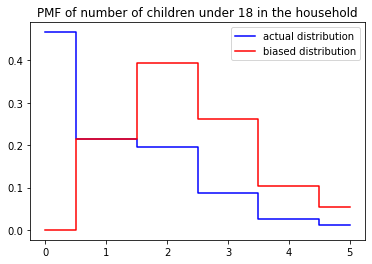

In [518]:
sns.lineplot(x = pd.Series(kid_pmf).index, y=pd.Series(kid_pmf).values,
             color='blue', drawstyle='steps-mid').set(title='PMF of number of children under 18 in the household')

sns.lineplot(x=pd.Series(kid_pmf_biased).index, y=pd.Series(kid_pmf_biased).values,
            color='red', drawstyle='steps-mid')

plt.legend(['actual distribution','biased distribution'])

In [519]:
def mean_using_pmf(dist):
    # pmf distribution is dictionary
    s = 0
    
    for key, val in dist.items():
        s += key*val
    
    return s

In [520]:
mean_using_pmf(kid_pmf)

1.024205155043831

In [521]:
mean_using_pmf(kid_pmf_biased)

2.461860525971477

In [522]:
def variance_using_pmf(dist):
    mean = mean_using_pmf(dist)
    
    s = 0
    for key, val in dist.items():
        s += val* (key - mean)**2
    
    return s    

In [523]:
variance_using_pmf(kid_pmf)

1.4128643263531193

In [524]:
variance_using_pmf(kid_pmf_biased)

1.205138353323034

## Ex.3

In [525]:
live = preg[preg.outcome==1]

In [526]:
preg_map = MakePregMap(live)

compute difference between pregnancy length for first and second child of the same woman

<AxesSubplot:ylabel='Count'>

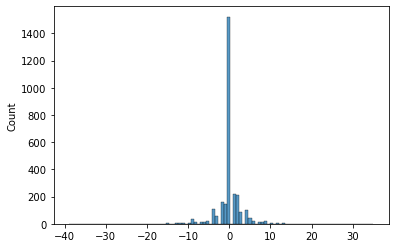

In [527]:
pair_diff = []
for key, vals in preg_map.items():
    if len(vals) > 1:
        diff = preg.loc[vals[0]].prglngth - preg.loc[vals[1]].prglngth
        pair_diff.append(diff)
        
sns.histplot(pair_diff, bins=100)

In [528]:
f"Comparing fisrt and second babies of the same woman, fisrt baby comes later on {round(np.mean(pair_diff),3)} week or {round(np.mean(pair_diff)*7*24,2)} hours"

'Comparing fisrt and second babies of the same woman, fisrt baby comes later on 0.056 week or 9.47 hours'

## Ex. 4 

In [529]:
speeds = pd.read_csv('code/speeds.csv')

Write a function called ObservedPmf that takes a Pmf representing the actual distribution of runners’ speeds, and the speed of a running observer, and returns a new Pmf representing the distribution of runners’ speeds as seen by the observer.

In [530]:
real_pmf = pmf(speeds['s'])

[Text(0.5, 1.0, 'PMF of real speed')]

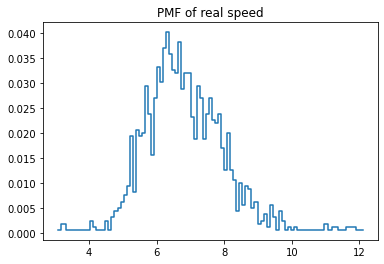

In [531]:
sns.lineplot(x=pd.Series(real_pmf).index, y=pd.Series(real_pmf).values, drawstyle='steps-mid').set(title='PMF of real speed')

In [532]:
def ObservedPmf(pmf_dist,v):
    obs_pmf = copy.deepcopy(pmf_dist)
    
    obs_pmf.update(( x, y*abs(x-v) ) for x,y in obs_pmf.items())
    
    # normalisation
    s = sum(obs_pmf.values())
    obs_pmf.update(( x, y/s ) for x,y in obs_pmf.items())
    
    return obs_pmf

[Text(0.5, 1.0, 'PMF of speeds as observer see')]

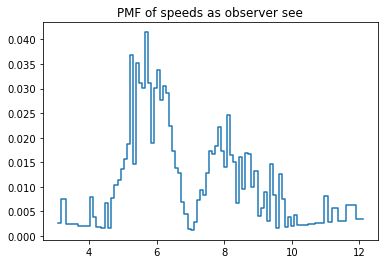

In [533]:
sns.lineplot(x=pd.Series(ObservedPmf(real_pmf,7)).index, y=pd.Series(ObservedPmf(real_pmf,7)).values, drawstyle='steps-mid').set(title='PMF of speeds as observer see')

# Percentiles

In [534]:
def PercentileRank(scores, your_score):
    count=0
    
    for score in scores:
        if score <= your_score:
            count += 1
            
    percentile_rank = 100 * count/len(scores)
    
    return percentile_rank

In [535]:
scores = [55, 66, 77, 88, 99]
your_score = 88
print(f"Percentile rank of score {your_score} is {PercentileRank(scores, your_score)} %")

Percentile rank of score 88 is 80.0 %


In [536]:
scores[1]

66

In [537]:
def Percentile(scores, rank):
    np.sort(scores)
    
    index = round((len(scores)-1)*rank/100)
    
    return scores[index]

In [538]:
Percentile(scores, 80)

88

# Cumulative distribution functions
 is the probability that X (some variable from a sequence of variables) will take a value less than or equal to x

In [539]:
def cdf(seq, x):
    count = 0
    
    for val in seq:
        if val <= x:
            count += 1
    
    prob = count/len(seq)
    
    return prob

In [540]:
sequence = [1, 2, 2, 3, 5]

cdf(sequence, 4)

0.8

<AxesSubplot:>

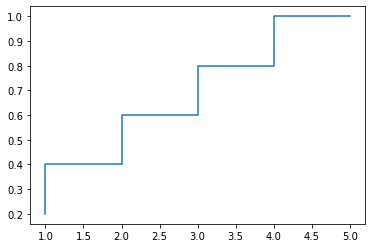

In [541]:
prob = []
diap = np.array(range(min(sequence),max(sequence)+1))
for val in diap:
    prob.append( cdf(diap,val) )
    
sns.lineplot(x=diap, y=prob, drawstyle='steps')

In [542]:
def cdf_dist(ser):
    res = {}

    length = len(ser)
    ser = np.sort(ser)
    
    for val in ser:
        less_than_val = ser <= val
        count = sum(less_than_val.astype('int'))
        
        res[val] = count/length
    
    return pd.Series(res)

[Text(0.5, 1.0, 'CDF of pregnancy length')]

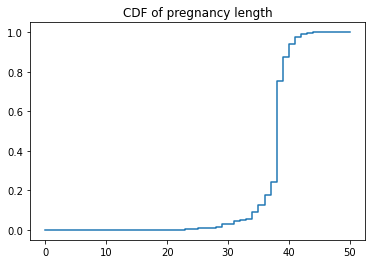

In [543]:
prglngth_cdf = cdf_dist(live.prglngth)

sns.lineplot(x=prglngth_cdf.index, y=prglngth_cdf.values, drawstyle='steps').set(title='CDF of pregnancy length')

One way to read a CDF is to look up percentiles. For example, it looks like about 10% of pregnancies are shorter than 36 weeks, and about 90% are shorter than 41 weeks. 

The CDF also provides a visual representation of the shape of the distribution. Common values appear as steep or vertical sections of the CDF; in this example, the mode at 39 weeks is apparent. There are few values below 30 weeks, so the CDF in this range is flat.

In [544]:
firsts_cdf = cdf_dist(firsts.totalwgt_lb)
others_cdf = cdf_dist(others.totalwgt_lb)

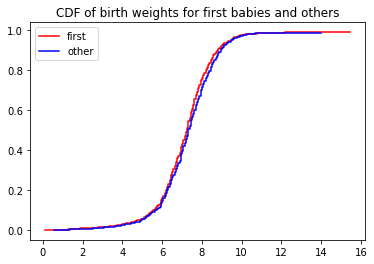

In [545]:
sns.lineplot(x=firsts_cdf.index, y=firsts_cdf.values, drawstyle='steps',color='red').set(title='CDF of birth weights for first babies and others')
sns.lineplot(x=others_cdf.index, y=others_cdf.values, drawstyle='steps',color='blue')
plt.legend(['first','other'])

## cdf vs percentile

In [546]:
weigth_cdf = cdf_dist( live[live.totalwgt_lb.isna()==False].totalwgt_lb )

In [547]:
sample = np.random.choice( live[live.totalwgt_lb.isna()==False].totalwgt_lb, 100, replace=True )

In [548]:
rank = []
for val in sample:
    rank.append( weigth_cdf.loc[val]*100 )

In [549]:
rank_cdf = cdf_dist(rank)

[Text(0.5, 1.0, 'CDF of percentile ranks for a random sample of birth weights'),
 Text(0.5, 0, 'percentile rank'),
 Text(0, 0.5, 'CDF')]

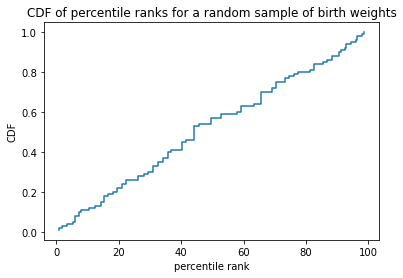

In [550]:
sns.lineplot(x=rank_cdf.index, y=rank_cdf.values,drawstyle='steps').set(title='CDF of percentile ranks for a random sample of birth weights', xlabel='percentile rank', ylabel='CDF')

## Comparing percentile ranks

In [551]:
def PoistionToPercentile(position, size):
    return round(( size - position )/size*100)

In [552]:
PoistionToPercentile(97,1633)

94

In [553]:
PoistionToPercentile(26,256)

90

In [554]:
def PercentileToPosition(percentile, size):
    return round(size - percentile * size / 100, 3)

In [555]:
PercentileToPosition(90, 171)

17.1

# Exercises for chapter 4

## How much did you weigh at birth?

In [556]:
my_weigth = 6.61387 # in lb

In [557]:
other_w_cdf = cdf_dist(others.totalwgt_lb)

In [558]:
my_index = other_w_cdf[(other_w_cdf.index > 6.1) & (other_w_cdf.index < 6.15)]
my_index.values[0]

0.15797254487856388

In [559]:
print(f"Percentile rank of my birth weight is {round(my_index.values[0]*100)}.")

Percentile rank of my birth weight is 16.


## Is the distribution of ramdom.random is uniform

In [560]:
rand = np.random.random(1000)

In [561]:
rand_cdf = cdf_dist(rand)

In [562]:
rand_pmf = pd.Series(pmf(pd.Series(rand)))

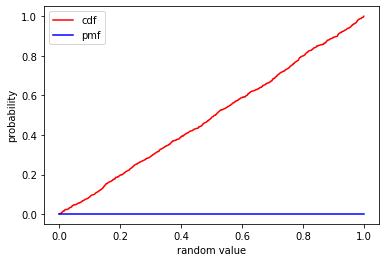

In [563]:
sns.lineplot( x=rand_cdf.index, y=rand_cdf.values,color='red').set(xlabel='random value', ylabel='probability')
sns.lineplot( x=rand_pmf.index, y=rand_pmf.values, color='blue')
plt.legend(['cdf','pmf'])

# Analytic distributions 

# Exponential distribution

In [564]:
def cdf_exp_dist(x, l):
    res = []
    
    for val in x:
        res.append(1 - math.exp(-l*val) )
    
    return res

In [565]:
x = np.linspace(0,3,30)

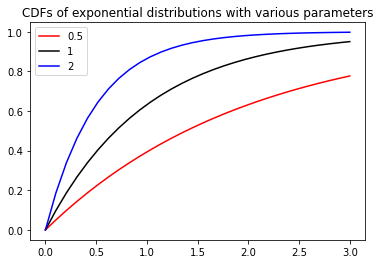

In [566]:
sns.lineplot(x=x, y = cdf_exp_dist(x,0.5), color='red').set(title='CDFs of exponential distributions with various parameters')
sns.lineplot(x=x, y = cdf_exp_dist(x,1), color='black')
sns.lineplot(x=x, y = cdf_exp_dist(x,2), color='blue')

plt.legend(['0.5','1','2'])

In the real world, exponential distributions come up when we look at a series of events and measure the times between events, called interarrival times. If the events are equally likely to occur at any time, the distribution of interarrival times tends to look like an exponential distribution.

In [567]:
bb = pd.read_csv('code/babyboom.csv')

In [568]:
bb.head()

,time,sex,weight_g,minutes
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


In [569]:
time_between_babies = bb.minutes.diff()

<AxesSubplot:xlabel='minutes', ylabel='Count'>

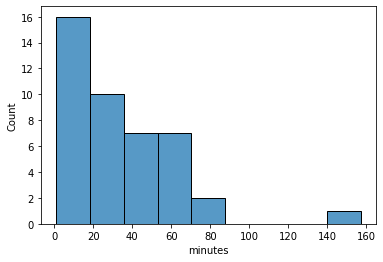

In [570]:
sns.histplot(time_between_babies)

[Text(0, 0.5, 'CDF'),
 Text(0.5, 0, 'minutes'),
 Text(0.5, 1.0, 'CDF of interarrival times ')]

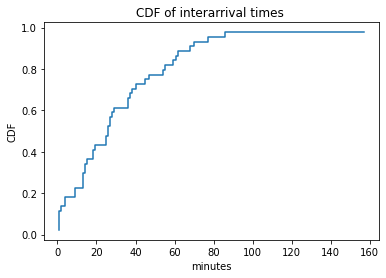

In [571]:
time_cdf = cdf_dist(time_between_babies)

sns.lineplot(x=time_cdf.index, y=time_cdf.values, drawstyle='steps').set(ylabel='CDF', xlabel='minutes',
                                                                         title='CDF of interarrival times ')

### complementary CDF
which is 1 − CDF(x), on a log-y scale. 

Used to to test whether an analytic distribution is a good model for a dataset.For data from an exponential distribution, the result is a straight line.

[None,
 Text(0.5, 0, 'minutes'),
 Text(0, 0.5, 'CCDF'),
 Text(0.5, 1.0, 'CCDF on a log-y scale')]

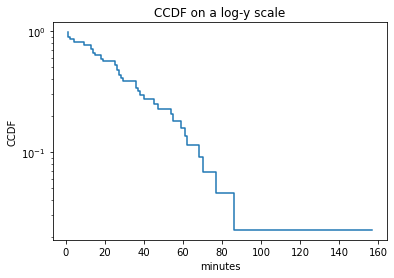

In [572]:
sns.lineplot(x=time_cdf.index, y=1-time_cdf.values, drawstyle='steps').set(yscale='log',
                                                                           xlabel='minutes',ylabel='CCDF',
                                                                          title='CCDF on a log-y scale')

# Normal distribution (Gaussian)

In [573]:
def EvalNormalCdf(x, mu=0, sigma=1):
    return scipy.stats.norm.cdf(x, loc=mu, scale=sigma)

In [574]:
x = np.linspace(0,5,30)

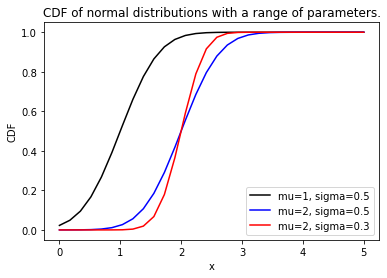

In [575]:
sns.lineplot(x=x, y=EvalNormalCdf(x,1,0.5),color='black').set(xlabel='x',ylabel='CDF')
sns.lineplot(x=x, y=EvalNormalCdf(x,2,0.5),color='blue').set(title='CDF of normal distributions with a range of parameters.')
sns.lineplot(x=x, y=EvalNormalCdf(x,2,0.3),color='red')

plt.legend(['mu=1, sigma=0.5','mu=2, sigma=0.5','mu=2, sigma=0.3'])

mu - mean, sigma - deviation

CDF has sigmoid shape

### birth weight

In [576]:
weights = live[live.totalwgt_lb.isna()==False].totalwgt_lb
cdf_weight = cdf_dist(weights)

fitting experimental cdf_weight to cdf of normal distribution

In [577]:
mean, var  = scipy.stats.distributions.norm.fit(weights)

[Text(0.5, 1.0, 'CDF of birth weights with a normal model.'),
 Text(0.5, 0, 'birth weight'),
 Text(0, 0.5, 'CDF')]

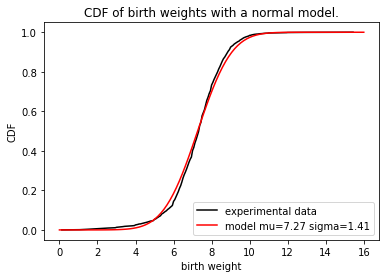

In [578]:
ax = sns.lineplot(x=cdf_weight.index, y=cdf_weight.values,color='black')

x_weights = np.linspace(0,16,100)
sns.lineplot(x=x_weights, y=scipy.stats.norm.cdf(x=x_weights,loc=mean,scale=var), color='red')

plt.legend(['experimental data',f'model mu={round(mean,2)} sigma={round(var,2)}'])
ax.set(title='CDF of birth weights with a normal model.',xlabel='birth weight',ylabel='CDF')

## normal probability plot

Sort the values in the sample.

From a standard normal distribution (µ=0 and σ=1), generate a random sample with the same size as the sample, and sort it.

Plot the sorted values from the sample versus the random values.


If the distribution of the sample is approximately normal, the result is a straight line with intercept mu and slope sigma

In [579]:
def MakeNormalPlot(data,datalabel='data',title='Normal probability plot'):
    plt.figure(figsize=[7,7])
    
    # create  a random sample from a normal distribution
    xs = np.random.normal(loc=0, scale=1, size=len(data))
    xs = np.sort(xs)
    
    # plot stright line
    xl = np.linspace(min(xs), max(xs),100)
    yl = data.mean() + data.std()*xl
    sns.lineplot(x=xl, y=yl, color='gray')
    
    # plot data vs random values
    ax = sns.lineplot(x=xs, y=np.sort(data))
    ax.set(title=title,xlabel='Standart deviation from mean',
           ylabel=datalabel)
    
    plt.legend(['ideal case (normal dist. for exp.data)',datalabel])

MakeNormalPlot(weights.values,'Birth weight')

#  lognormal distribution
the logarithms of a set of values have a normal distribution

the parameters of the lognormal distribution are usually denoted µ and σ. But remember that these parameters are not the mean and standard deviation; the mean of a lognormal distribution is exp(µ +σ2/2) and the standard deviation is ugly (see http://wikipedia.org/wiki/Log-normal_distribution).

In [580]:
brfss = pd.read_csv('code/brfss.csv')

In [581]:
brfss.head()

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82.0,2,76.363636,185.870345,70.91,157.0
1,65.0,2,72.727273,126.603027,72.73,163.0
2,48.0,2,NaN,181.063210,NaN,165.0
3,61.0,1,73.636364,517.926275,73.64,170.0
4,26.0,1,88.636364,1252.624630,88.64,185.0


In [582]:
adult_weight = brfss[brfss.wtkg2.isna()==False].wtkg2

In [583]:
cdf_adult_weight = cdf_dist(adult_weight)

In [584]:
mean, var  = scipy.stats.distributions.norm.fit(adult_weight)

In [585]:
mean_log, var_log  = scipy.stats.distributions.norm.fit(np.log10(adult_weight.values))

In [586]:
x_weights = np.linspace(0,200,100)
x_weights_log = np.linspace(1,3,100)

[Text(0.5, 1.0, 'CDF of adult weights on log scale'),
 Text(0.5, 0, 'np.log10(adult weight)'),
 Text(0, 0.5, 'CDF')]

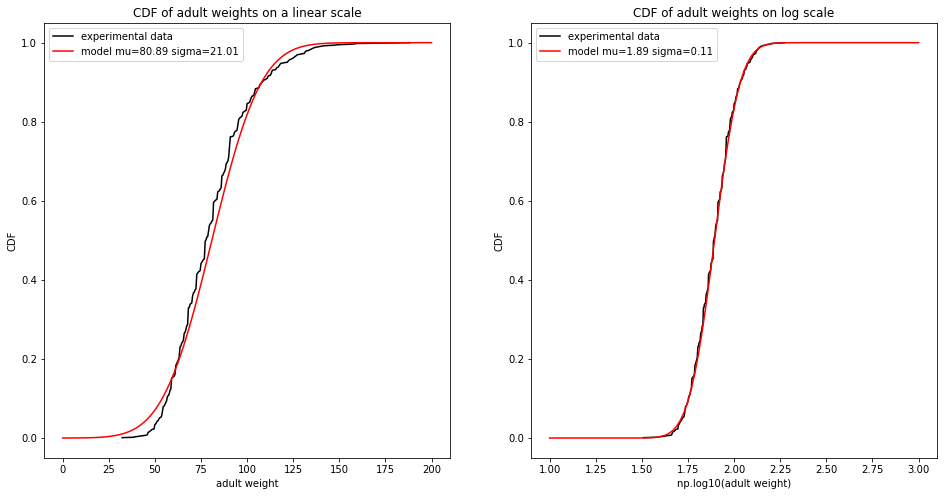

In [587]:
fig, axs = plt.subplots(figsize=(16,8),nrows=1, ncols=2)

sns.lineplot(x=cdf_adult_weight.index, y=cdf_adult_weight.values,color='black',ax=axs[0])
sns.lineplot(x=x_weights, y=scipy.stats.norm.cdf(x=x_weights,loc=mean,scale=var), color='red',ax=axs[0])

axs[0].legend(['experimental data',f'model mu={round(mean,2)} sigma={round(var,2)}'])
axs[0].set(title='CDF of adult weights on a linear scale',xlabel='adult weight',ylabel='CDF')

# in log scale
sns.lineplot(x=np.log10(cdf_adult_weight.index), y=cdf_adult_weight.values,color='black',ax=axs[1])
sns.lineplot(x=x_weights_log, y=scipy.stats.norm.cdf(x=x_weights_log,loc=mean_log,scale=var_log), color='red', ax=axs[1])

axs[1].legend(['experimental data',f'model mu={round(mean_log,2)} sigma={round(var_log,2)}'])
axs[1].set(title='CDF of adult weights on log scale',xlabel='np.log10(adult weight)',ylabel='CDF')

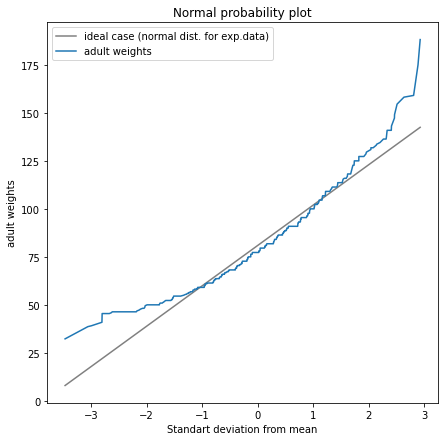

In [588]:
MakeNormalPlot(adult_weight.values,datalabel='adult weights',title='Normal probability plot')

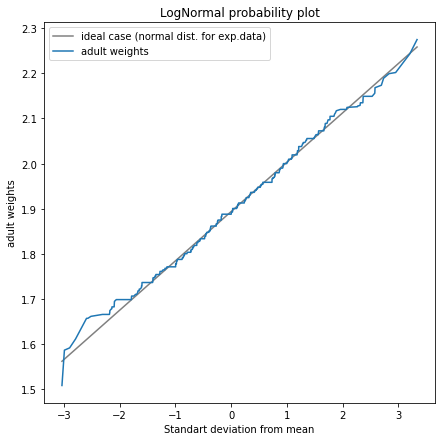

In [589]:
MakeNormalPlot(np.log10(adult_weight.values),datalabel='adult weights',title='LogNormal probability plot')

# The Pareto distribution

 xm is the minimum possible value

In [590]:
def cdf_Pareto(x,xm,a):
    return 1-(xm/x)**a    

In [591]:
def pdf_Pareto(x,xm,a):
    return 1

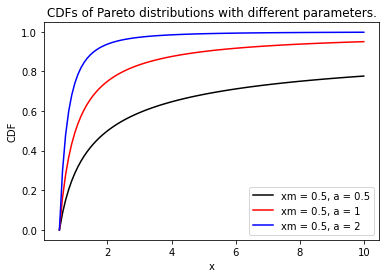

In [592]:
xm = 0.5

x = np.linspace(xm,10,100)

ax = sns.lineplot(x=x, y=cdf_Pareto(x,xm,0.5),color='black')
sns.lineplot(x=x, y=cdf_Pareto(x,xm,1),color='red')
sns.lineplot(x=x, y=cdf_Pareto(x,xm,2),color='blue')

ax.set(title='CDFs of Pareto distributions with different parameters.', xlabel='x', ylabel='CDF')
plt.legend([f'xm = {xm}, a = 0.5',f'xm = {xm}, a = 1',f'xm = {xm}, a = 2'])

There is a simple visual test that indicates whether an empirical distribution fits a Pareto distribution: 

on a log-log scale, the CCDF looks like a straight line.

logy ≈ −α (logx − logxm)



In [593]:
df_populations = pd.read_csv('code/PEP_2012_PEPANNRES_with_ann.csv', header=None, skiprows=2, encoding='iso-8859-1')

In [594]:
df_populations.head()

,0,1,2,3,4,5,6,7
0,1620000US0100124,100124,"Abbeville city, Alabama",2688,2688,2682,2688,2654
1,1620000US0100460,100460,"Adamsville city, Alabama",4522,4522,4518,4504,4490
2,1620000US0100484,100484,"Addison town, Alabama",758,756,753,751,746
3,1620000US0100676,100676,"Akron town, Alabama",356,356,355,345,344
4,1620000US0100820,100820,"Alabaster city, Alabama",30352,30359,30460,30690,30991


In [595]:
population = df_populations[7]

In [596]:
cdf_pop = cdf_dist(population)

[None,
 None,
 Text(0.5, 0, 'population'),
 Text(0, 0.5, 'CCDF'),
 Text(0.5, 1.0, 'CCDFs of city and town populations, on a log-log scale.')]

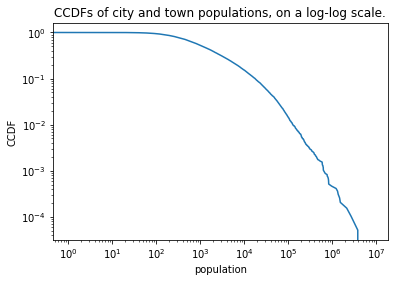

In [597]:
ax=sns.lineplot(x=cdf_pop.index, y=1-cdf_pop.values)
ax.set(
    xscale='log',yscale='log', 
       xlabel='population',ylabel='CCDF',title='CCDFs of city and town populations, on a log-log scale.')


<ipython-input-598-2aa15c6008c2>:1: RuntimeWarning: divide by zero encountered in log10
  ax=sns.lineplot(x=np.log10(cdf_pop.index), y=cdf_pop.values)


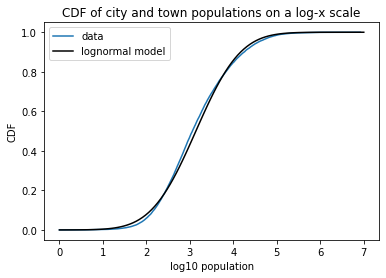

In [598]:
ax=sns.lineplot(x=np.log10(cdf_pop.index), y=cdf_pop.values)
ax.set(xlabel='log10 population',ylabel='CDF',title='CDF of city and town populations on a log-x scale')

#model
population_non_zero = population[population.values>0]
mean_log, std_log = scipy.stats.distributions.norm.fit(np.log10(population_non_zero))

x_log = np.linspace(0,7,100)
sns.lineplot(x=x_log, y=scipy.stats.distributions.norm.cdf(x=x_log,loc=mean_log,scale=std_log),color='black')

plt.legend(['data','lognormal model'])

<AxesSubplot:>

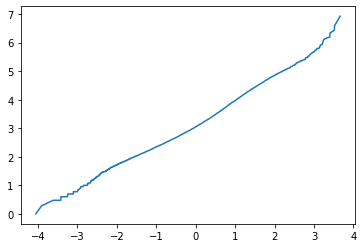

In [599]:
norm_sample = np.random.normal(size=len(population_non_zero.values))

sns.lineplot(x=np.sort(norm_sample),y=np.sort(np.log10(population_non_zero.values)),)

In [600]:
norm_sample

array([ 0.14591656,  0.5022461 ,  0.12362091, ..., -0.28026363,
       -0.74224738, -1.57521441])

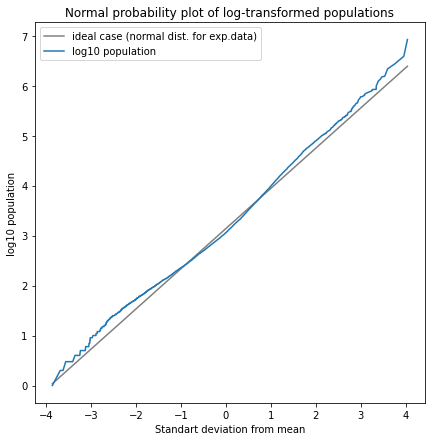

In [601]:
MakeNormalPlot(np.log10(population_non_zero.values),datalabel='log10 population',title='Normal probability plot of log-transformed populations')

Neither model is perfect. The Pareto model only applies to the largest 1% of cities, but it is a better fit for that part of the distribution. The lognormal model is a better fit for the other 99%. Which model is appropriate depends on which part of the distribution is relevant.

# Generating random numbers with a given distribution function

In [602]:
def random_val_from_exp_func(lam):
    # random probability
    p = np.random.random()
    
    # value with with probability
    x = -math.log(1-p)/lam
    
    return x

<AxesSubplot:ylabel='Count'>

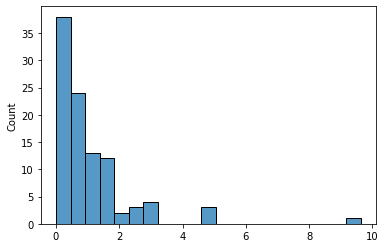

In [603]:
rand_exp = []
for i in range(0,100):
    rand_exp.append(random_val_from_exp_func(1))

sns.histplot(rand_exp)

# Exercises for chapter 5

## Exercise 1 

In [604]:
brfss.head()

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82.0,2,76.363636,185.870345,70.91,157.0
1,65.0,2,72.727273,126.603027,72.73,163.0
2,48.0,2,NaN,181.063210,NaN,165.0
3,61.0,1,73.636364,517.926275,73.64,170.0
4,26.0,1,88.636364,1252.624630,88.64,185.0


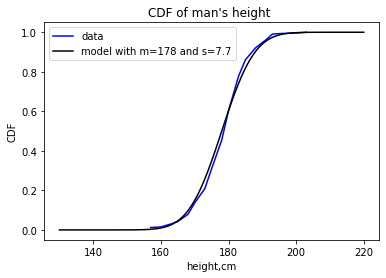

In [605]:
man = brfss[(brfss.sex==1) &( brfss.htm3.isna()==False)].htm3

cdf_height = cdf_dist(man)

sns.lineplot(x=cdf_height.index, y=cdf_height.values,color='blue')
ax=sns.lineplot(x=np.linspace(130,220,100),
             y=scipy.stats.distributions.norm.cdf(x=np.linspace(130,220,100),loc=178, scale=7.7),
            color='black')

ax.set(title="CDF of man's height ", xlabel='height,cm',ylabel='CDF')
plt.legend(['data',f'model with m=178 and s=7.7'])

In [606]:
min_height = 177.8
max_height = 185.4

In [607]:
res = scipy.stats.norm.cdf(max_height, loc=178, scale=7.7) - scipy.stats.norm.cdf(min_height, loc=178, scale=7.7)
print(f"{round(100*res)}% of men have height between {min_height} and {max_height} cm")

34% of men have height between 177.8 and 185.4 cm


##  Exercise 2

<AxesSubplot:>

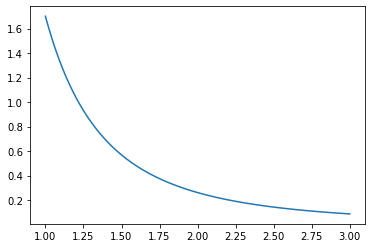

In [608]:
xm = 1
a = 1.7
x=np.linspace(1,3,100)
sns.lineplot(x=x,y=scipy.stats.pareto.pdf(x,b=a, scale=xm))

In [609]:
pareto_dist = scipy.stats.pareto(b=a, scale=xm)
mean = pareto_dist.mean()
median = pareto_dist.median()
mean, median

(2.428571428571429, 1.5034066538560549)

In [610]:
print(f"{round(100*pareto_dist.cdf(mean))} % of population are shorter than the mean = {round(mean,2)}")

78 % of population are shorter than the mean = 2.43


In [611]:
print(f"{round(7000000000*(1-pareto_dist.cdf(1000)))} people would be taller than 1km in Pareto world with 7 billion people")

55603 people would be taller than 1km in Pareto world with 7 billion people


In [612]:
print(f"How tall do we expect the tallest person to be? we assume, that only one person out of 7 bil has the higest height, and it is {round(pareto_dist.ppf(1-1/7000000000))} m")

How tall do we expect the tallest person to be? we assume, that only one person out of 7 bil has the higest height, and it is 618350 m


## Exercise 3  

# Weibull distribution

In [613]:
alpha =2
beta=4

In [614]:
w_rand = []
for i in range(0,1000):
    w_rand.append(random.weibullvariate(alpha=alpha, beta=beta))

<AxesSubplot:ylabel='Count'>

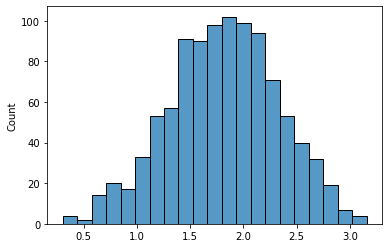

In [615]:
x=np.linspace(0,10,1000)
sns.histplot(w_rand)

[Text(0.5, 0, 'random value'), Text(0, 0.5, 'CDF')]

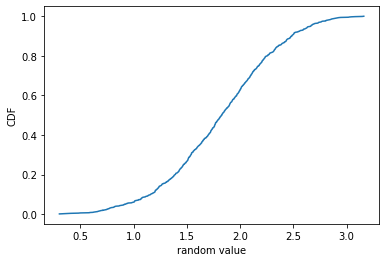

In [616]:
w_cdf = cdf_dist(w_rand)

sns.lineplot(x=w_cdf.index, y=w_cdf.values).set(xlabel='random value',ylabel='CDF')

In [617]:
w_cdf_non_zero = w_cdf[w_cdf.values<1]

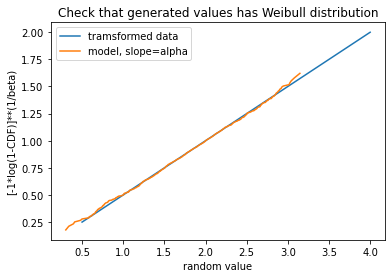

In [618]:
x=np.linspace(0.5,4,100)
sns.lineplot(x=x,y=x/alpha)

ax = sns.lineplot(x=w_cdf_non_zero.index, y=(abs(-1*np.log(1-w_cdf_non_zero.values)))**(1/beta) )
ax.set(xlabel='random value',ylabel='[-1*log(1-CDF)]**(1/beta)',
      title='Check that generated values has Weibull distribution')


plt.legend(['tramsformed data','model, slope=alpha'])

In [619]:
w_cdf_non_zero.values

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108,
       0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117,
       0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125, 0.126,
       0.127, 0.128,

## Exercise 4 

In [620]:
cdf_time = cdf_dist(time_between_babies)
lam = 1/time_between_babies.mean()

In [621]:
exp_rand = []
for i in range(0,len(time_between_babies)):
    exp_rand.append(random.expovariate(lam))
    
cdf_rand = cdf_dist(exp_rand)

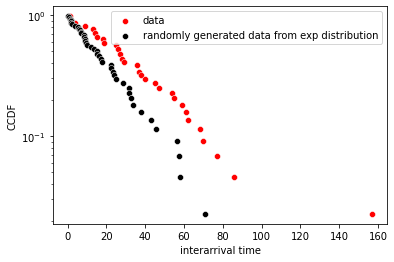

In [622]:
ax = sns.scatterplot(x=cdf_time.index, y=1-cdf_time.values, color='red')
sns.scatterplot(x=cdf_rand.index, y=1-cdf_rand.values, color='black')

ax.set(yscale='log',xlabel='interarrival time',ylabel='CCDF')
plt.legend(['data','randomly generated data from exp distribution'])

## Exercise 5   

In [623]:
hinc = pd.read_csv('code/hinc.csv')

In [624]:
hinc.head()

,income,freq,cumsum,ps
0,4999.0,4204,4204,0.034330
1,9999.0,4729,8933,0.072947
2,14999.0,6982,15915,0.129963
3,19999.0,7157,23072,0.188407
4,24999.0,7131,30203,0.246640


In [625]:
hinc[hinc.income==np.inf]

,income,freq,cumsum,ps
41,inf,2911,122458,1.0


In [626]:
hinc.iloc[41]

income         inf
freq        2911.0
cumsum    122458.0
ps             1.0
Name: 41, dtype: float64

In [627]:
hinc.drop(hinc[hinc.income==np.inf].index, axis=0, inplace=True)

<AxesSubplot:xlabel='income', ylabel='Count'>

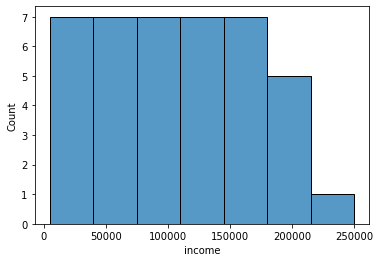

In [628]:
sns.histplot(hinc.income)

In [629]:
cdf_hinc = cdf_dist(hinc.income)

[Text(0.5, 0, 'outcome'), Text(0, 0.5, 'CDF')]

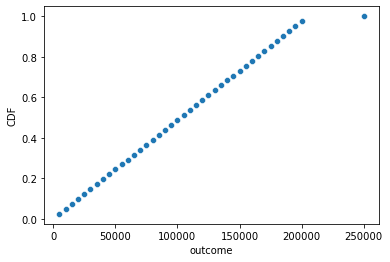

In [630]:
ax=sns.scatterplot(x=cdf_hinc.index, y=cdf_hinc.values)
ax.set(xlabel='outcome',ylabel='CDF')

check for exp function

[Text(0.5, 0, 'outcome'), Text(0, 0.5, 'CCDF'), None]

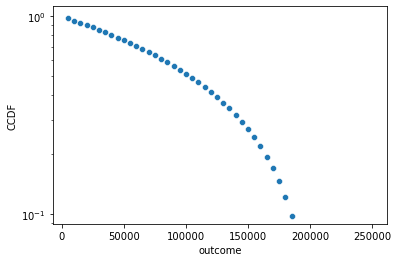

In [632]:
ax=sns.scatterplot(x=cdf_hinc.index, y=1-cdf_hinc.values)
ax.set(xlabel='outcome',ylabel='CCDF',yscale='log')

check for normal distribution

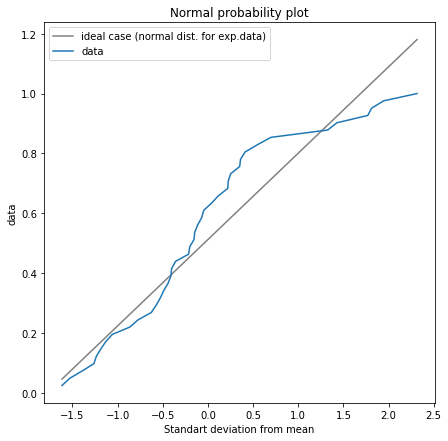

In [633]:
MakeNormalPlot(cdf_hinc.values)

check for pareto

[None, None, Text(0.5, 0, 'outcome'), Text(0, 0.5, 'CDF')]

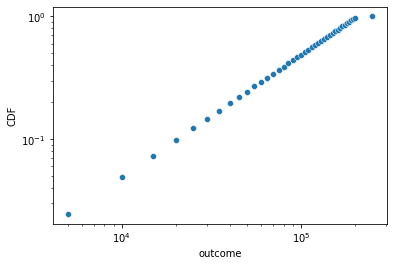

In [634]:
ax=sns.scatterplot(x=cdf_hinc.index, y=cdf_hinc.values)
ax.set(yscale='log',xscale='log', xlabel='outcome',ylabel='CDF')

# Probability density functions

The derivative of a CDF

probability density measures probability per unit of x. In order to get a probability mass, you have to integrate over x

In [636]:
mean, std = 163, math.sqrt(52.8)

[Text(0, 0.5, 'PDF'),
 Text(0.5, 0, 'height, cm'),
 Text(0.5, 1.0, ' A normal PDF that models adult female height in the U.S')]

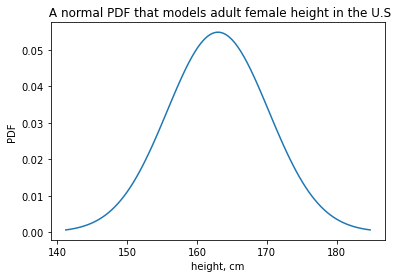

In [643]:
x = np.linspace(mean-3*std, mean+3*std,100)
sns.lineplot(x=x,y=scipy.stats.norm.pdf(x=x,loc=mean, scale=std)).set(ylabel='PDF',xlabel='height, cm',
                                                                     title=' A normal PDF that models adult female height in the U.S')

In [646]:
f"the density of the distribution at a location one standard deviation from the mean={mean} cm is {round(scipy.stats.norm.pdf(x=mean+std,loc=mean, scale=std),3)} in units of probability mass per cm"

'the density of the distribution at a location one standard deviation from the mean=163 cm is 0.033 in units of probability mass per cm'

# Kernel density estimation (KDE) 

is an algorithm that takes a sample and finds an appropriately smooth PDF that fits the data. 

In [647]:
sample = [random.gauss(mean, std) for i in range(0,500)]

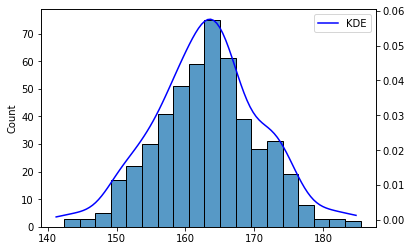

In [671]:
kernel = scipy.stats.gaussian_kde(sample)

x = np.linspace(mean-3*std, mean+3*std,100)

sns.histplot(sample)
ax2 = plt.twinx()
sns.lineplot(x=x,y=kernel.evaluate(x),color='blue',ax=ax2)

plt.legend(['KDE'])